In [2]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)
library(gridExtra)
#library(ggforce)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:
AA_E_Long <- read.csv('./datos/AA_E_Long.csv')
AA_NE_Long <- read.csv('./datos/AA_NE_Long.csv')

head(AA_NE_Long)

X,id,group,age,sex,weekNames,level,week,AA
<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>
1,1,teen,17,girl,ARGCalostrum,1,1,ARG
2,2,teen,16,boy,ARGCalostrum,1,1,ARG
3,3,teen,17,boy,ARGCalostrum,1,1,ARG
4,4,teen,16,boy,ARGCalostrum,1,1,ARG
5,5,teen,16,NA,ARGCalostrum,2,1,ARG
6,6,teen,16,boy,ARGCalostrum,2,1,ARG


# $\alpha_{id}$ effect

In [13]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [14]:
num_obs <- AA_NE_Long %>% group_by(id, AA) %>% summarise(num_obs = sum(!is.na(level)))
head(num_obs)

id,AA,num_obs
<int>,<fct>,<int>
1,ALA,4
1,ARG,4
1,ASN,4
1,ASP,4
1,CYS,4
1,GLN,4


In [15]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [16]:
nAA_E <- dim(AA_E_Nested)[1]
nAA_NE <- dim(AA_NE_Nested)[1]

In [41]:
me_E_S <- list()
tidy_E_S <- list()

for(i in 1:nAA_E){
    
    me_E_S[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E_S[[i]] <- tidy(me_E_S[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

boundary (singular) fit: see ?isSingular


In [28]:
me_NE_S <- list()
tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    me_NE_S[[i]] <- meSex(AA_NE_Nested$data[[i]])
    tidy_NE_S[[i]] <- tidy(me_NE_S[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [40]:
ranef(me_E_G[[1]])$id %>% head()

,(Intercept)
,<dbl>
1,-0.014677562
2,0.001756398
3,0.108370892
4,-0.092576022
6,-0.076369691
7,0.079882488


In [20]:
one_obs_index <- num_obs %>% filter(AA == 'ARG', num_obs < 2) %>% select(id)

# No $\alpha_{id}$ 

In [34]:
lmSex <- function(df){
    
    me <- lm(level ~ sex + week, data = df)
    
    return(me)
}

In [35]:
mod1 <- lmSex(AA_E_Nested$data[[1]])
tidy(mod1) %>% select(term, estimate)

term,estimate
<chr>,<dbl>
(Intercept),1.91837606
sexgirl,-0.17980848
week,0.01613915


In [36]:
lm_E_S <- list()
lm_tidy_E_S <- list()

for(i in 1:nAA_E){
    
    lm_E_S[[i]] <- lmSex(AA_E_Nested$data[[i]])
    lm_tidy_E_S[[i]] <- tidy(lm_E_S[[i]]) %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [37]:
lm_NE_S <- list()
lm_tidy_NE_S <- list()

for(i in 1:nAA_NE){
    
    lm_NE_S[[i]] <- lmSex(AA_NE_Nested$data[[i]])
    lm_tidy_NE_S[[i]] <- tidy(lm_NE_S[[i]]) %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [38]:
lm_tidy_NE_S[[1]]
tidy_NE_S[[1]]

term,estimate,std.error,statistic,p.value,AA
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
(Intercept),1.38779276,0.1038167,13.3677281,9.370341e-29,ARG
sexgirl,-0.10686670,0.1278442,-0.8359135,4.043118e-01,ARG
week,-0.02819265,0.0109353,-2.5781316,1.073340e-02,ARG


term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<fct>
(Intercept),1.40209993,0.11349256,12.3541127,ARG
sexgirl,-0.14263751,0.15228825,-0.9366285,ARG
week,-0.02560585,0.01016558,-2.5188766,ARG


In [52]:
me_coef_E_S <- bind_rows(tidy_E_S) %>% filter(grepl("sexgirl", term))
me_coef_NE_S <- bind_rows(tidy_NE_S) %>% filter(grepl("sexgirl", term))

lm_coef_E_S <- bind_rows(lm_tidy_E_S) %>% filter(grepl("sexgirl", term))
lm_coef_NE_S <- bind_rows(lm_tidy_NE_S) %>% filter(grepl("sexgirl", term))

In [54]:
me_coef_NE_S
lm_coef_NE_S

term,estimate,std.error,statistic,AA
<chr>,<dbl>,<dbl>,<dbl>,<fct>
sexgirl,-0.14263751,0.1522882,-0.9366285,ARG
sexgirl,-0.54756968,0.4801045,-1.1405219,ASP
sexgirl,-1.61818930,1.6590414,-0.9753761,ALA
sexgirl,0.08339889,0.1257034,0.6634576,ASN
sexgirl,-0.35682776,0.1635167,-2.1822096,CYS
sexgirl,-1.81908239,0.7897730,-2.3032978,GLY
sexgirl,-14.39755180,6.5220682,-2.2075132,GLU
sexgirl,-3.06094539,3.3877643,-0.9035296,GLN
sexgirl,-0.38692513,0.3436295,-1.1259951,PRO


term,estimate,std.error,statistic,p.value,AA
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
sexgirl,-0.10686670,0.12784422,-0.8359135,0.404311832,ARG
sexgirl,-0.49103477,0.40143256,-1.2232061,0.222850827,ASP
sexgirl,-1.48348397,1.38899957,-1.0680234,0.286940243,ALA
sexgirl,0.08834972,0.11945416,0.7396120,0.460498966,ASN
sexgirl,-0.36488166,0.13414632,-2.7200273,0.007167546,CYS
sexgirl,-1.76619168,0.66729874,-2.6467781,0.008846554,GLY
sexgirl,-13.73657310,5.62418996,-2.4424092,0.015555734,GLU
sexgirl,-2.95129058,2.84943254,-1.0357468,0.301709750,GLN
sexgirl,-0.35706764,0.29387192,-1.2150451,0.225940268,PRO


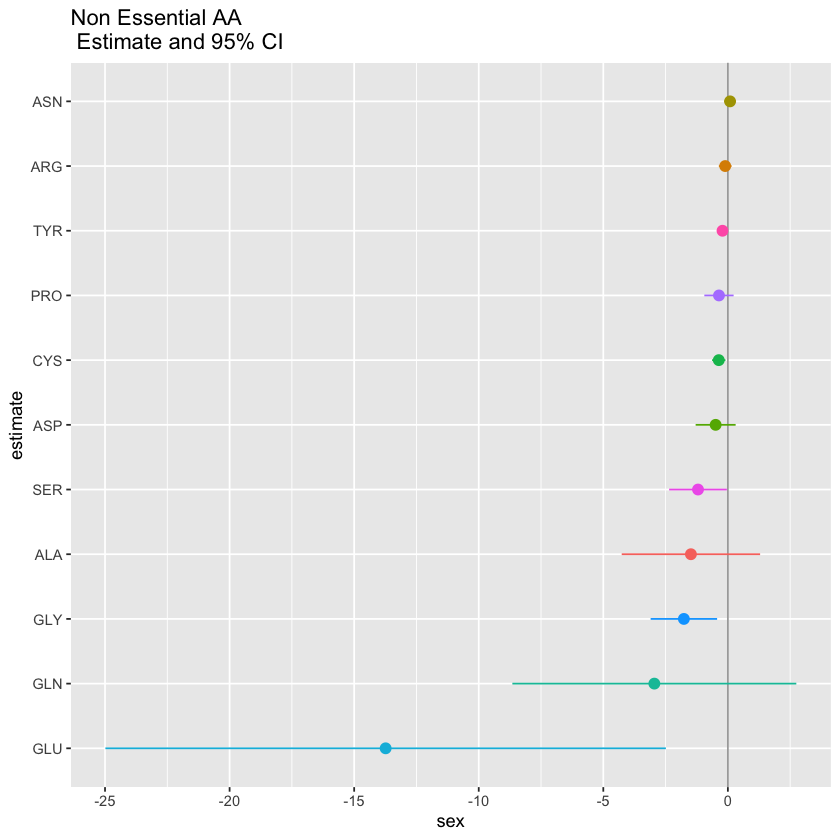

In [55]:
#png(filename="./plots/NEAA_lm_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(lm_coef_NE_S, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab('sex') + xlab('estimate')
#dev.off()

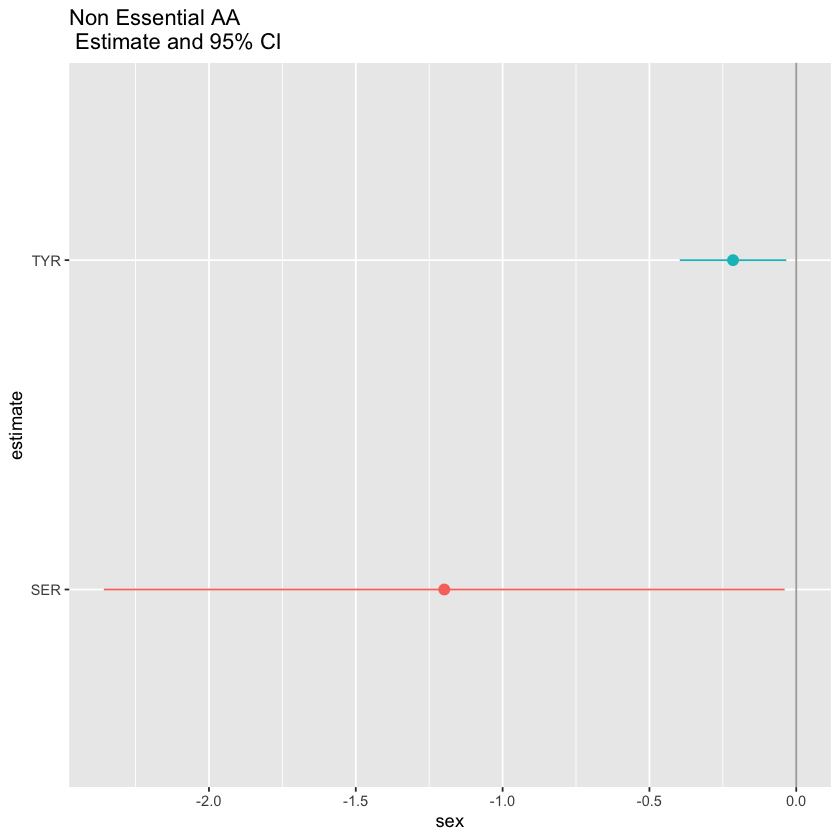

In [58]:

#png(filename="./plots/NEAA_lm_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(lm_coef_NE_S %>% filter(AA %in% c('TYR', 'SER')), aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab('sex') + xlab('estimate')
#dev.off()
